Swiss Temperature Data
---

In this exercise we use [Swiss temperature data](https://www.meteoswiss.admin.ch/home/climate/swiss-climate-in-detail/Swiss-temperature-mean/Data-on-the-Swiss-temperature-mean.html) which describes the average temperature measured across various altitudes in Switzerland. The measurement has been available in monthly frequency since 1864 and is continuously updated with the most recent values. The objective is to explore the application of `period_range` with real data.


Create a date column with `period_range`  by going through the following steps:

1. Load the data from the file `c2_10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt` in the Resource tab into a dataframe using the `time` column as the index. Check the shape and the data in order to answer the following __questions__. 

    - Are all years from 1864 to 2020 present in the data?
    - Are all months present in the data? 

__Remark__: If you open the txt file in a text editor or JupyterLab you can see that the actual table with the data is preceded by a few lines of meta data. The parameter `skiprows` in the `read_csv()` function might help.

In [8]:
import pandas as pd

data = pd.read_table("c2_10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt", skiprows =15 )
data.head()

,time,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,djf,mam,jja,son,winter,summer,year
0,1864,-7.10,-4.52,0.04,2.11,7.43,9.48,12.37,10.95,8.59,3.50,-0.51,-4.47,NaN,3.19,10.93,3.86,NaN,8.49,3.16
1,1865,-3.47,-6.25,-5.91,7.03,10.09,10.98,13.99,11.16,11.90,5.19,1.26,-3.07,-4.73,3.74,12.04,6.12,-2.85,10.86,4.41
2,1866,-1.31,-0.42,-1.00,4.11,4.95,12.02,12.25,9.98,9.70,5.34,-0.20,-0.49,-1.60,2.69,11.42,4.95,0.11,8.84,4.58
3,1867,-3.87,0.56,-0.13,3.49,7.74,10.57,11.29,12.93,10.43,2.92,-1.43,-5.80,-1.27,3.70,11.60,3.97,0.20,9.41,4.06
4,1868,-5.46,-1.53,-2.30,2.33,12.04,11.97,12.89,12.50,11.12,4.76,-1.98,1.27,-4.26,4.02,12.45,4.63,-2.27,10.47,4.80


In [14]:
# Are all years from 1864 to 2020 present in the data?
print(2020-1864)
y_diff = data.time - data.time.shift(1)
print(sum(y_diff.dropna()))

156
156.0


In [25]:
#Are all months present in the data
print(data[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']].isna().sum())
nan_rows = data[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']].isna().any(axis=1)
print( data[nan_rows])

jan    0
feb    0
mar    0
apr    0
may    0
jun    0
jul    0
aug    0
sep    1
oct    1
nov    1
dec    1
dtype: int64
     time   jan   feb   mar   apr   may    jun   jul   aug  sep  oct  nov  \
156  2020 -0.28  1.62  1.53  7.62  9.53  11.82  15.4  15.2  NaN  NaN  NaN   

     dec   djf   mam    jja  son  winter  summer  year  
156  NaN  0.71  6.23  14.14  NaN    2.27     NaN   NaN  


__Answers__:
- Yes we have all years.
- In 2020t september, october, novenber and december are missing.

2. Select all the columns containing monthly data.

In [26]:
data_month = data[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]

#solution :
# Select the first 12 columns
data_m = data.loc[:, "jan":"dec"]
data_m.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,-7.10,-4.52,0.04,2.11,7.43,9.48,12.37,10.95,8.59,3.50,-0.51,-4.47
1,-3.47,-6.25,-5.91,7.03,10.09,10.98,13.99,11.16,11.90,5.19,1.26,-3.07
2,-1.31,-0.42,-1.00,4.11,4.95,12.02,12.25,9.98,9.70,5.34,-0.20,-0.49
3,-3.87,0.56,-0.13,3.49,7.74,10.57,11.29,12.93,10.43,2.92,-1.43,-5.80
4,-5.46,-1.53,-2.30,2.33,12.04,11.97,12.89,12.50,11.12,4.76,-1.98,1.27


3. We would like to build a new __dataframe__ with new __index__ and __columns__ 'Year', 'Month' and 'Temp', where each row represents a month:
    - use `stack()` to create the new dataframe (see the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)  and examples therein). `stack()`  is a useful function for recreating dataframes and integrates the columns as part of the index. In fact, we get a multiIndex dataframe with the year as level=0 and the month as level=1.
    - reset the index of the new dataframe.
    - finally, give new names to the columns of the dataframe (see [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) for how to change the name of columns).
    <br>You can do these three steps together in a single line or separately.

In [37]:
data.set_index('time', inplace=True)

KeyError: "None of ['time'] are in the columns"

In [38]:
data_m = data.loc[:, "jan":"dec"]
data_m.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
time,,,,,,,,,,,,
1864,-7.10,-4.52,0.04,2.11,7.43,9.48,12.37,10.95,8.59,3.50,-0.51,-4.47
1865,-3.47,-6.25,-5.91,7.03,10.09,10.98,13.99,11.16,11.90,5.19,1.26,-3.07
1866,-1.31,-0.42,-1.00,4.11,4.95,12.02,12.25,9.98,9.70,5.34,-0.20,-0.49
1867,-3.87,0.56,-0.13,3.49,7.74,10.57,11.29,12.93,10.43,2.92,-1.43,-5.80
1868,-5.46,-1.53,-2.30,2.33,12.04,11.97,12.89,12.50,11.12,4.76,-1.98,1.27


In [45]:
df = data_m.stack().reset_index().rename(columns={0: "Temp", "time": "Year", "level_1": "Month"})

Let's check the head of the final dataframe:

In [46]:
df.head()

,Year,Month,Temp
0,1864,jan,-7.10
1,1864,feb,-4.52
2,1864,mar,0.04
3,1864,apr,2.11
4,1864,may,7.43


4.  Create a date column `df['Date']` using `period_range`. Note that `period_range` requires setting several parameters. In particular, of the three parameters `start`, `end`, and `periods` exactly two must be specified. Finally, you need to specify the frequency parameter `freq`. Your data are in monthly frequency and you can find the appropriate frequency strings from [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
<br>You should set the `start` to be the first month e.g. '1864-jan'. You can ignore the end but then you have to specify the number of `periods`, here total number of months.

In [60]:
df['Date'] = pd.period_range(start='1864-01-01', end='2020-08-01', freq='M').to_timestamp()

In [61]:
df.head()

,Year,Month,Temp,Date
Date,,,,
1864-01,1864,jan,-7.10,1864-01-01
1864-02,1864,feb,-4.52,1864-02-01
1864-03,1864,mar,0.04,1864-03-01
1864-04,1864,apr,2.11,1864-04-01
1864-05,1864,may,7.43,1864-05-01


5. Set the `Date` column as your new index.

In [62]:
df.set_index('Date', inplace=True)
df.head()

,Year,Month,Temp
Date,,,
1864-01-01,1864,jan,-7.10
1864-02-01,1864,feb,-4.52
1864-03-01,1864,mar,0.04
1864-04-01,1864,apr,2.11
1864-05-01,1864,may,7.43


6. Finally plot the monthly temperatures. You should get the following plot:

In [63]:
Temperatures = df["Temp"]
Temperatures.head()

Date
1864-01-01   -7.10
1864-02-01   -4.52
1864-03-01    0.04
1864-04-01    2.11
1864-05-01    7.43
Name: Temp, dtype: float64

In [64]:
Temperatures.index[:4]

DatetimeIndex(['1864-01-01', '1864-02-01', '1864-03-01', '1864-04-01'], dtype='datetime64[ns]', name='Date', freq=None)

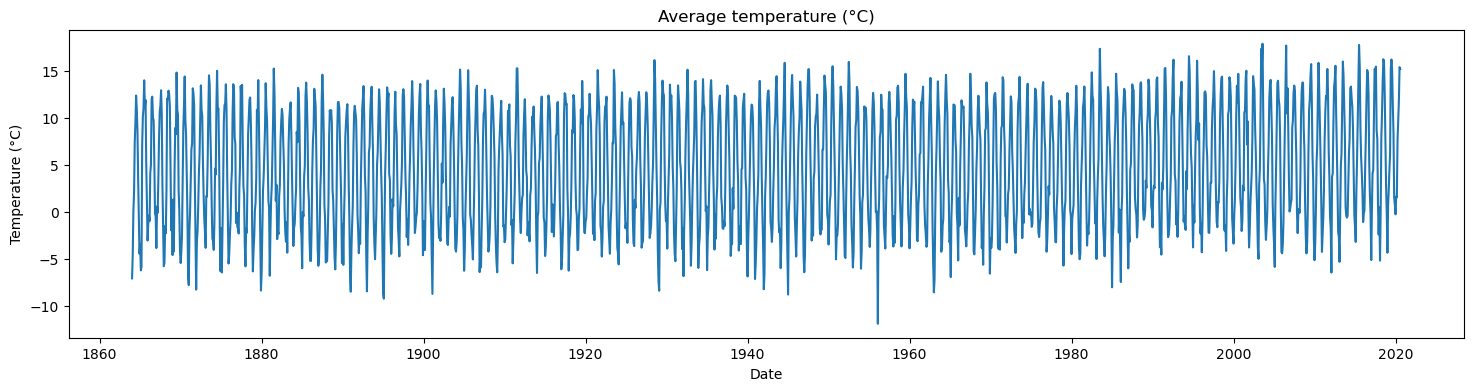

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set the size of the plot
fig = plt.subplots(figsize=(18, 4))

# Plot the trend of prices
plt.plot(Temperatures)
plt.title("Average temperature (°C)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


            Year Month  Temp     Date
Date                                 
1864-01-01  1864   jan -7.10  1864-01
1864-02-01  1864   feb -4.52  1864-02
1864-03-01  1864   mar  0.04  1864-03
1864-04-01  1864   apr  2.11  1864-04
1864-05-01  1864   may  7.43  1864-05
         Year Month  Temp
Date                     
1864-01  1864   jan -7.10
1864-02  1864   feb -4.52
1864-03  1864   mar  0.04
1864-04  1864   apr  2.11
1864-05  1864   may  7.43


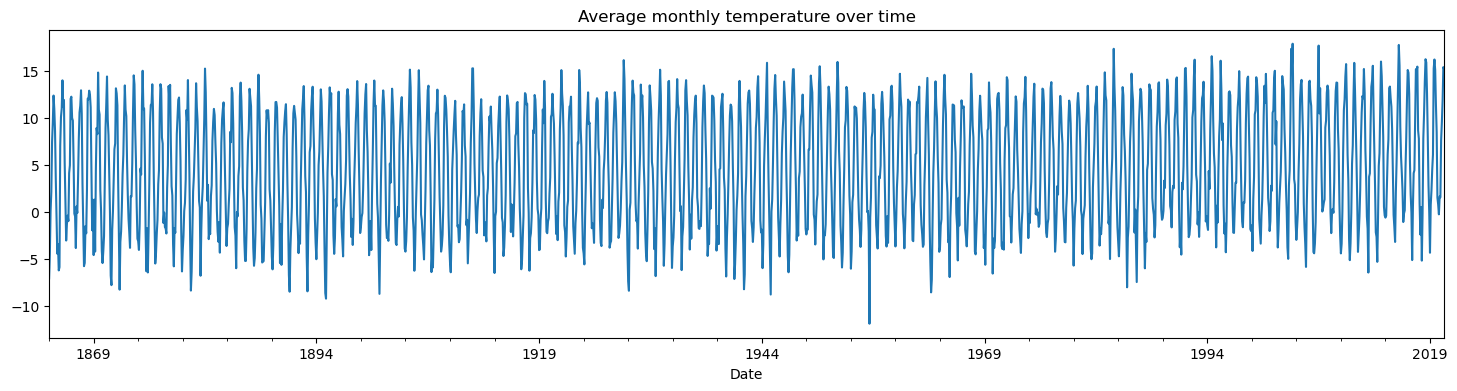

In [66]:
#Solution :
# create dates
df["Date"] = pd.period_range("1864-jan", periods=df.shape[0], freq="M")
print(df.head())
# set the Date to be the index of the dataframe
df.set_index("Date", inplace=True)
print(df.head())
df.Temp.plot(figsize=(18, 4))
plt.title("Average monthly temperature over time")
plt.show()

__Question__: What can you observe in this plot? What is hard to observe from the current plot?

__Answer__: We observe the average range of temperature change across year. We didn't see the evolution of the temperature accross year.

You might have noticed that the plot with monthly temperature is not very informative to see the trend of the temperature over the last two centuries. It will be easier to look at the average annual temperature.

7. Use `groupby()` to calculate the average annual temperatures and plot them over time.

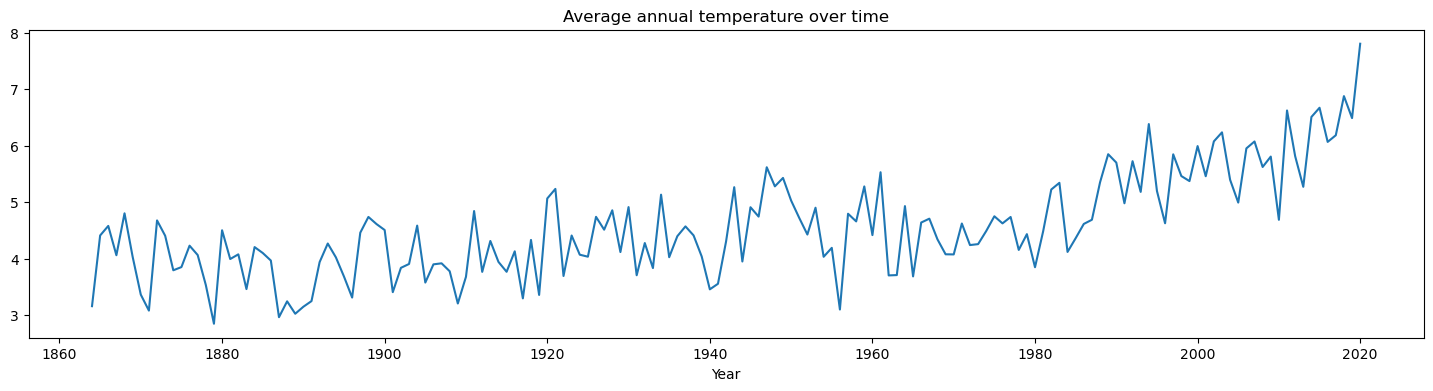

In [68]:
df.groupby("Year")["Temp"].mean().plot(figsize=(18, 4))
plt.title("Average annual temperature over time")
plt.show()

__Questions__: 
- If you consider the average annual temperature decade by decade, what do you observe?
- What do you observe if you compare the data of the first 100 years with the data of the last 50 years?

__Answers__: 
- Decade by decade we see a high variability, inside a decade. 
- We observe an increase of the temperature during the last decade in comparison to the first century where the temperature was more stable.

8. Use `resample()` to calculate the average annual temperatures and plot them over time.

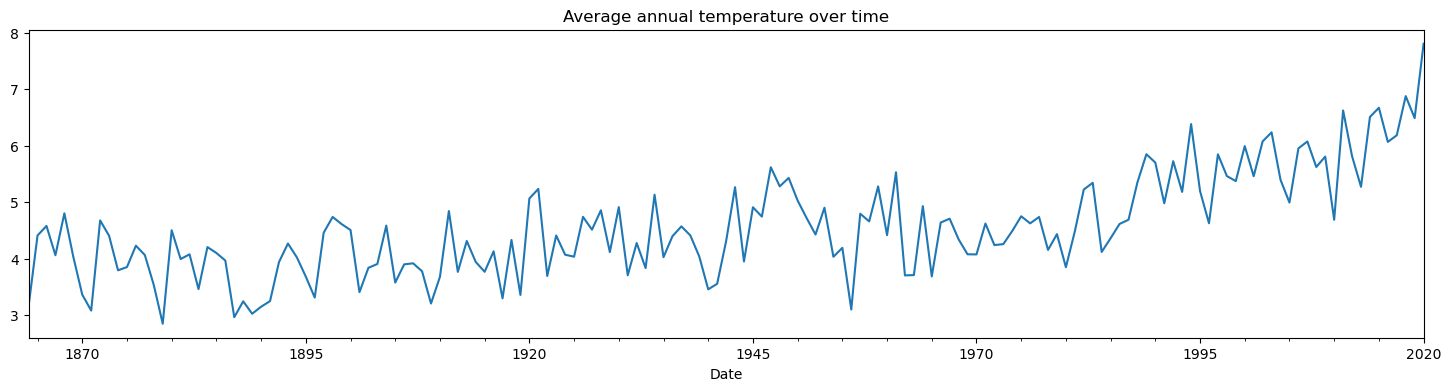

In [69]:
df['Temp'].resample('A').mean().plot(figsize=(18, 4))
plt.title('Average annual temperature over time')
plt.show()

__Question__: Do you get the same plot as in the previous case by `groupby()`?

__Answers__: yes it's look like the same. we detect the same pattern

9. Use `rolling()` to calculate the average temperatures over a decade and plot them over time.

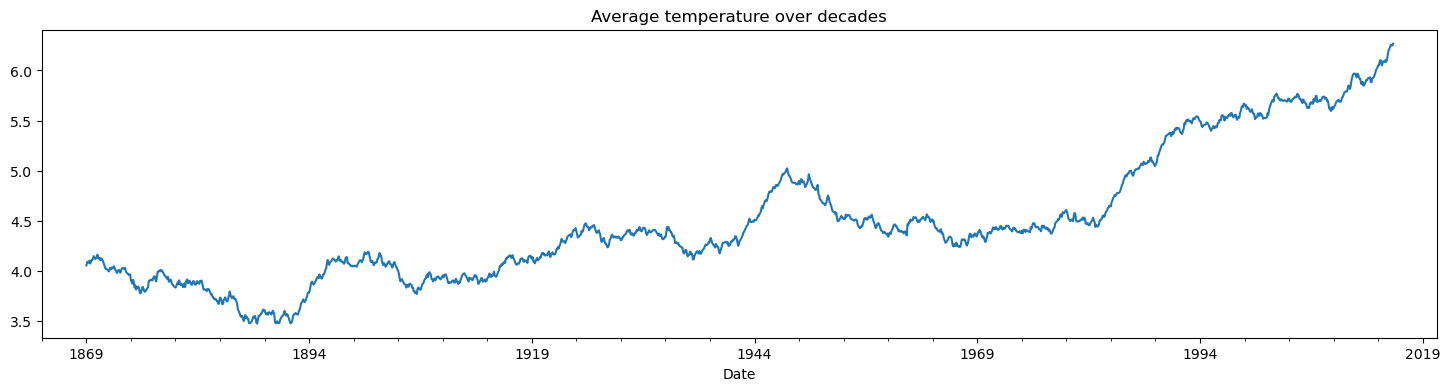

In [70]:
df['Temp'].rolling(120, center=True).mean().plot(figsize=(18, 4))
plt.title('Average temperature over decades')
plt.show()

__Question__: Do you observe an upward trend in the temperatures?

__Answers__: Yes

****
__The case of missing values in the data__: 
Note that we could use  `period_range` easily as described above because we already knew that there is no missing month in the data. However, in case a month is missing the entire row will be dropped out when we stack the data which makes our final column `Date` misaligned (try this by deleting a value from the original data set and go through the steps and see the difference). There are two solutions (see below) when we know that there might be missing values in the data set:

- In step 3, set `dropna=False` when you stack the data `data_m.stack(dropna=False)`, and follow the next steps. By this we tell the stack function to keep the column with the missing value and let it to appear as a row with `NaN` value.
- In step 4, instead of using `period_range` to create dates, define a date column by using `df['Date']  = df['Year'].astype('str')+'-'+df['Month']`, and follow the next steps. 

In the first solution, the temporal order of the data remains in place and missing values appear as `NaN`s in front of their corresponding dates and you can see the gaps in the plot. However, in the second solution the chronological order of data will change in the sense that the months with missing temperature will not appear in the data and the plot.